In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from time import time
from Examples import EjemploNoComputacional, MachineReplacement
from PythonMDP.PolicyIteration.RawPI import PolicyIteration
from PythonMDP.PolicyIteration.ModifiedPI import ModifiedPolicyIteration

# Ejemplos Policy Iteration
### 1. Ejemplo tablero
#### 1.1 Carga del ejemplo

In [2]:
ex = EjemploNoComputacional()
states = ex.estados
controls = ex.controles
tr_matrix = ex.matriz_concatenada
rew_vector = ex.g_concatenado

#### 1.2 Policy Iteration

In [3]:
policy_iterator = PolicyIteration(states=states,
                                  controls=controls,
                                  transition_matrix=tr_matrix,
                                  expected_reward_vector=rew_vector,
                                  alpha=0.9,
                                  sparse_m=False)
j_s, policies, iterations = policy_iterator.policy_iteration()

#### 1.3. Análisis resultados
1.3.1 Política óptima

In [4]:
print(f'Iteraciones requeridas: {iterations}')

# Política óptima
optimal_dec = []
for dec_rule in policies[-1]:
    optimal_dec.append(dec_rule[1])
optimal_policy = zip(states.values(), optimal_dec)
for element in optimal_policy:
    print(f'Decisión óptima en {element[0]}: {element[1]}')

Iteraciones requeridas: 3
Decisión óptima en 1: 1
Decisión óptima en 2: 0


1.3.2 Funciones de Valor

[]

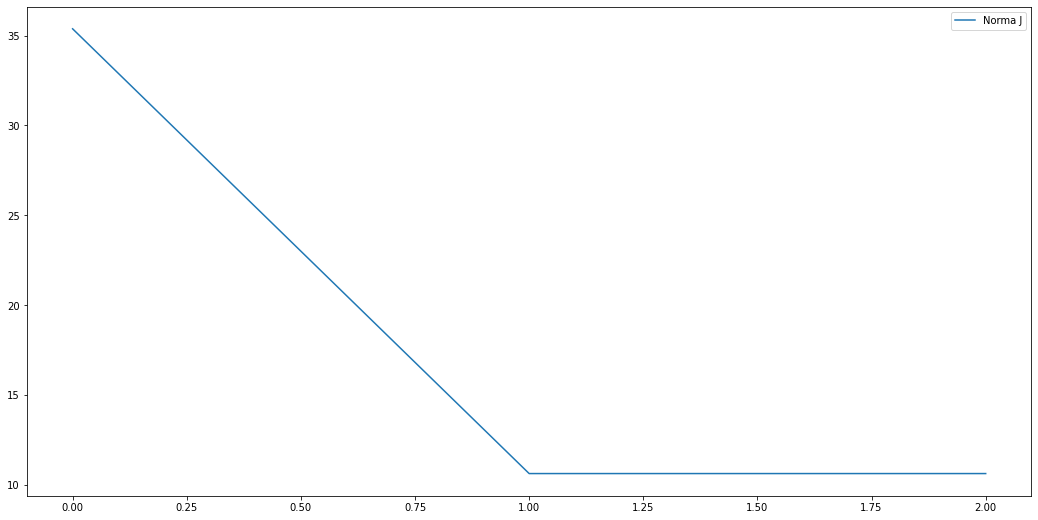

In [5]:
grafica = pd.DataFrame()
grafica['Norma J'] = [np.linalg.norm(j) for j in j_s]
plt.figure(figsize=(18,9))
annot_kws={'fontsize':10,
           'fontstyle':'italic',
           'color':"b",
           'alpha':0.6,
           'rotation':"vertical",
           'verticalalignment':'center',
           'backgroundcolor':'b'}
sns.lineplot(data=grafica)
plt.plot()

### 2. Machine Replacement
#### 2.1 Carga del ejemplo

In [66]:
# Se le pueden redefinir la función de costo y el parámetro de la distribución de Zipf
machine = MachineReplacement(machine_states=10, cost_fuction=lambda x: x**(3/2), new_machine_cost=500, zipf_p=1.4)
states = machine.states
controls = machine.controls
tr_matrix = machine.prob_matrix
rew_vector = machine.reward_vector

policy_iterator = PolicyIteration(states=states,
                                  controls=controls,
                                  transition_matrix=tr_matrix,
                                  expected_reward_vector=rew_vector,
                                  alpha=0.9,
                                  sparse_m=True)
j_s, policies, iterations = policy_iterator.policy_iteration()

### 2.2 Análisis de resultados
2.2.1 Política óptima

In [67]:
print(f'Iteraciones requeridas: {iterations}')

# Política óptima
optimal_dec = []
for state in policies[-1]:

    optimal_dec.append(state[1])
optimal_policy = zip(states.values(), optimal_dec)
for element in optimal_policy:
    print(f'Decisión óptima en {element[0]}: {element[1]}')

Iteraciones requeridas: 4
Decisión óptima en Performance: 100.0%: 0
Decisión óptima en Performance: 88.89%: 0
Decisión óptima en Performance: 77.78%: 0
Decisión óptima en Performance: 66.67%: 0
Decisión óptima en Performance: 55.56%: 1
Decisión óptima en Performance: 44.44%: 1
Decisión óptima en Performance: 33.33%: 1
Decisión óptima en Performance: 22.22%: 1
Decisión óptima en Performance: 11.11%: 1
Decisión óptima en Performance: 0.0%: 1


2.2.2 Funciones de Valor

[]

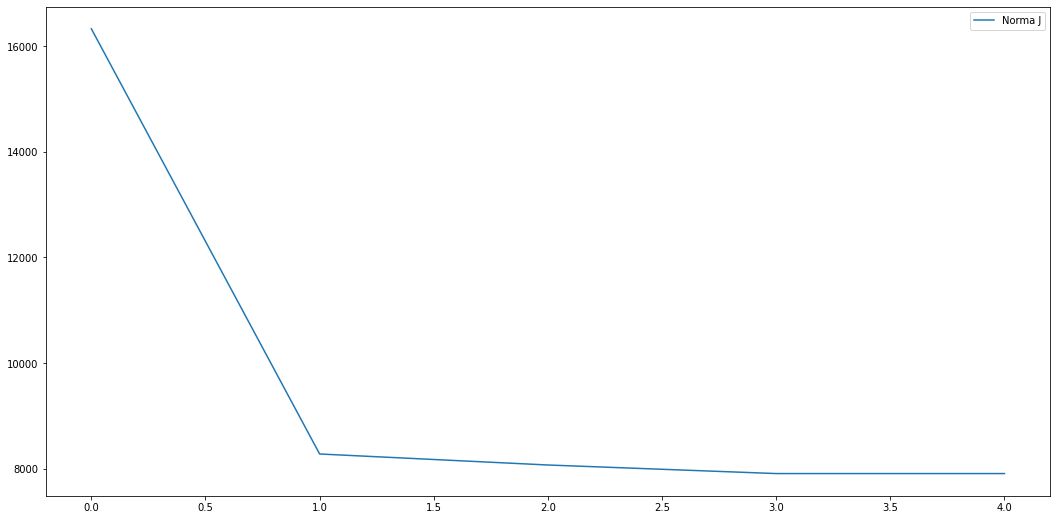

In [63]:
grafica = pd.DataFrame()
grafica['Norma J'] = [np.linalg.norm(j) for j in j_s]
plt.figure(figsize=(18,9))
annot_kws={'fontsize':10,
           'fontstyle':'italic',
           'color':"w",
           'alpha':0.6,
           'rotation':"vertical",
           'verticalalignment':'center',
           'backgroundcolor':'w'}
sns.lineplot(data=grafica)
plt.plot()

[]

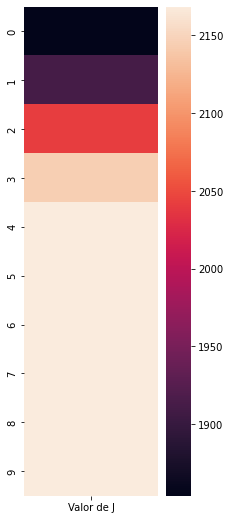

In [68]:
grafica = pd.DataFrame()
grafica['Valor de J'] = [j for j in j_s[-1]]
plt.figure(figsize=(3,9))
annot_kws={'fontsize':10,
           'fontstyle':'italic',
           'color':"w",
           'alpha':0.6,
           'rotation':"vertical",
           'verticalalignment':'center',
           'backgroundcolor':'w'}
sns.heatmap(data=grafica)
plt.plot()

# Optimistic Policy Iteration

In [15]:
machine = MachineReplacement(machine_states=100, cost_fuction=lambda x: x, new_machine_cost=90, zipf_p=1.4)
states = machine.states
controls = machine.controls
tr_matrix = machine.prob_matrix
rew_vector = machine.reward_vector
start = time()
policy_iterator = PolicyIteration(states=states,
                                  controls=controls,
                                  transition_matrix=tr_matrix,
                                  expected_reward_vector=rew_vector,
                                  alpha=0.9,
                                  sparse_m=True)
j_sPI, policiesPI, iterationsPI = policy_iterator.policy_iteration()
end = time()
time_PI = np.round(end - start, 5)

In [16]:
startO = time()
opt_policy_iterator = ModifiedPolicyIteration(states=states,
                                              controls=controls,
                                              transition_matrix=tr_matrix,
                                              expected_reward_vector=rew_vector,
                                              alpha=0.9,
                                              sparse=True,
                                              m=10)
j_sOPI, policiesOPI, iterationsOPI = policy_iterator.policy_iteration()
endO = time()
time_OPI = np.round(endO - startO, 5)

#### Analisis de tiempos

In [17]:
print(f'Tiempo utilizado por Policy Iteration: {time_PI} segundos')
print(f'Tiempo utilizado por Modified Policy Iteration: {time_OPI} segundos')

Tiempo utilizado por Policy Iteration: 0.00397 segundos
Tiempo utilizado por Modified Policy Iteration: 0.00705 segundos


[]

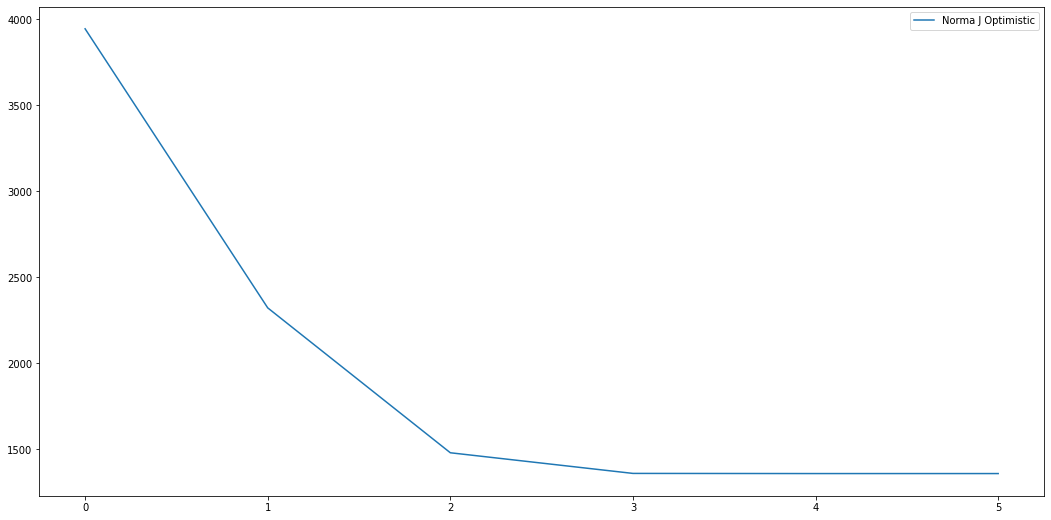

In [13]:
grafica = pd.DataFrame()
grafica['Norma J Optimistic'] = [np.linalg.norm(j) for j in j_sOPI]
plt.figure(figsize=(18,9))
annot_kws={'fontsize':10,
           'fontstyle':'italic',
           'color':"w",
           'alpha':0.6,
           'rotation':"vertical",
           'verticalalignment':'center',
           'backgroundcolor':'w'}
sns.lineplot(data=grafica)
plt.plot()